In [3]:
#el pandas nos funciona bien, matplotlib libreria para imprimir graficos
#vamos a probar read_excel openpyxl
import pandas as pd
import matplotlib.pyplot as plt



<class 'SyntaxError'>: invalid syntax (<ipython-input-3-88cc89c3ff4c>, line 5)

In [2]:
ventas2014 = pd.read_excel("VentasGroucery_2014.xlsx", sheet_name="Ventas")

<class 'ImportError'>: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [20]:
ventas2014 = pd.read_csv("VentasGroucery_2014.csv")
ventas2015 = pd.read_csv("VentasGroucery_2015.csv")
ventas2016 = pd.read_csv("VentasGroucery_2016.csv")

In [21]:
#vamos a renombrar las columnas al castellano
ventas2014cas = ventas2014.rename(columns={"Product":"Producto"
                                           ,"Category":"Categoria"
                                           ,"Unit Price":"Precio"
                                           ,"Quantity":"Cantidad"
                                          ,"Customer":"Cliente"
                                          ,"Ship City":"Ciudad"
                                          ,"Ship Country":"Pais"
                                          ,"Order Date":"Fecha"}) 


In [22]:
#Como eliminar una columna de un dataframe con drop, axis 1 es para columna y axis 0 es para filas
ventas2014def = ventas2014cas.drop(["Order ID"], axis=1) 
#ventas2014def = ventas2014cas.drop([4], axis=0)
ventas2014def                                  

,Producto,Categoria,Precio,Cantidad,Cliente,Ciudad,Pais,Fecha
0,Singaporean Hokkien Fried Mee,Grains/Cereals,"9,8",1,Vins et alcools Chevalier,Reims,France,4/8/2014
1,Mozzarella di Giovanni,Dairy Products,"34,8",5,Vins et alcools Chevalier,Reims,France,4/8/2014
2,Queso Cabrales,Dairy Products,14,12,Vins et alcools Chevalier,Reims,France,4/8/2014
3,Tofu,Produce,"18,6",9,Toms Spezialitäten,Münster,Germany,5/8/2014
4,Manjimup Dried Apples,Produce,"42,4",40,Toms Spezialitäten,Münster,Germany,5/8/2014
...,...,...,...,...,...,...,...,...
312,Gudbrandsdalsost,Dairy Products,"28,8",30,Eastern Connection,London,UK,27/12/2014
313,Queso Cabrales,Dairy Products,"16,8",24,Antonio Moreno Taquería,México D.F.,Mexico,28/12/2014
314,Original Frankfurter grüne Soße,Condiments,"10,4",5,Galería del gastrónomo,Barcelona,Spain,29/12/2014
315,Louisiana Fiery Hot Pepper Sauce,Condiments,"16,8",5,Galería del gastrónomo,Barcelona,Spain,29/12/2014


In [26]:
total20142015 = pd.concat([ventas2014def,ventas2015])
total20142015

,Producto,Categoria,Precio,Cantidad,Cliente,Ciudad,Pais,Fecha
0,Singaporean Hokkien Fried Mee,Grains/Cereals,"9,8",1,Vins et alcools Chevalier,Reims,France,4/8/2014
1,Mozzarella di Giovanni,Dairy Products,"34,8",5,Vins et alcools Chevalier,Reims,France,4/8/2014
2,Queso Cabrales,Dairy Products,14,12,Vins et alcools Chevalier,Reims,France,4/8/2014
3,Tofu,Produce,"18,6",9,Toms Spezialitäten,Münster,Germany,5/8/2014
4,Manjimup Dried Apples,Produce,"42,4",40,Toms Spezialitäten,Münster,Germany,5/8/2014
...,...,...,...,...,...,...,...,...
1035,Chef Anton's Cajun Seasoning,Condiments,22,1,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015
1036,Aniseed Syrup,Condiments,10,4,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015
1037,Chang,Beverages,19,24,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015
1038,Original Frankfurter grüne Soße,Condiments,13,2,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015


In [28]:
#Vamos a ver funciones de resumen por agrupacion, la suma de cantidad por catogoria, mediante goupby
sumacategoria = total20142015.groupby("Categoria").sum()
sumacategoria

,Cantidad
Categoria,
Beverages,5364
Condiments,3608
Confections,5023
Dairy Products,6054
Grains/Cereals,2974
Meat/Poultry,2880
Produce,1819
Seafood,4691


In [44]:
#Como cambiar la coma por el punto en una columna de una dataframe con replace
#Pero nos hace el cambio, y continua siendo un text, por lo tanto no podemos hacer operaciones matematicas
total20142015["Precio"] =total20142015["Precio"].str.replace(",",".")
#Convertir la columna o campo precio en un decimal, mediante astype(float)
total20142015["Precio"] =total20142015["Precio"].astype(float)
total20142015

,Producto,Categoria,Precio,Cantidad,Cliente,Ciudad,Pais,Fecha
0,Singaporean Hokkien Fried Mee,Grains/Cereals,9.80,1,Vins et alcools Chevalier,Reims,France,4/8/2014
1,Mozzarella di Giovanni,Dairy Products,34.80,5,Vins et alcools Chevalier,Reims,France,4/8/2014
2,Queso Cabrales,Dairy Products,14.00,12,Vins et alcools Chevalier,Reims,France,4/8/2014
3,Tofu,Produce,18.60,9,Toms Spezialitäten,Münster,Germany,5/8/2014
4,Manjimup Dried Apples,Produce,42.40,40,Toms Spezialitäten,Münster,Germany,5/8/2014
...,...,...,...,...,...,...,...,...
1035,Chef Anton's Cajun Seasoning,Condiments,22.00,1,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015
1036,Aniseed Syrup,Condiments,10.00,4,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015
1037,Chang,Beverages,19.00,24,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015
1038,Original Frankfurter grüne Soße,Condiments,13.00,2,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015


In [45]:
total20142015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1039
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Producto   1357 non-null   object 
 1   Categoria  1357 non-null   object 
 2   Precio     1357 non-null   float64
 3   Cantidad   1357 non-null   int64  
 4   Cliente    1357 non-null   object 
 5   Ciudad     1357 non-null   object 
 6   Pais       1357 non-null   object 
 7   Fecha      1357 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 63.6+ KB


In [46]:
total20142015["Precio"].sum()

33640.759999999995

In [47]:
#vamos a crear un campo calculado, es decir calcularemos el importe = Precio * Cantidad
total20142015["Importe"] = total20142015["Precio"] * total20142015["Cantidad"]

In [48]:
total20142015

,Producto,Categoria,Precio,Cantidad,Cliente,Ciudad,Pais,Fecha,Importe
0,Singaporean Hokkien Fried Mee,Grains/Cereals,9.80,1,Vins et alcools Chevalier,Reims,France,4/8/2014,9.80
1,Mozzarella di Giovanni,Dairy Products,34.80,5,Vins et alcools Chevalier,Reims,France,4/8/2014,174.00
2,Queso Cabrales,Dairy Products,14.00,12,Vins et alcools Chevalier,Reims,France,4/8/2014,168.00
3,Tofu,Produce,18.60,9,Toms Spezialitäten,Münster,Germany,5/8/2014,167.40
4,Manjimup Dried Apples,Produce,42.40,40,Toms Spezialitäten,Münster,Germany,5/8/2014,1696.00
...,...,...,...,...,...,...,...,...,...
1035,Chef Anton's Cajun Seasoning,Condiments,22.00,1,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015,22.00
1036,Aniseed Syrup,Condiments,10.00,4,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015,40.00
1037,Chang,Beverages,19.00,24,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015,456.00
1038,Original Frankfurter grüne Soße,Condiments,13.00,2,Rattlesnake Canyon Grocery,Albuquerque,USA,5/6/2015,26.00


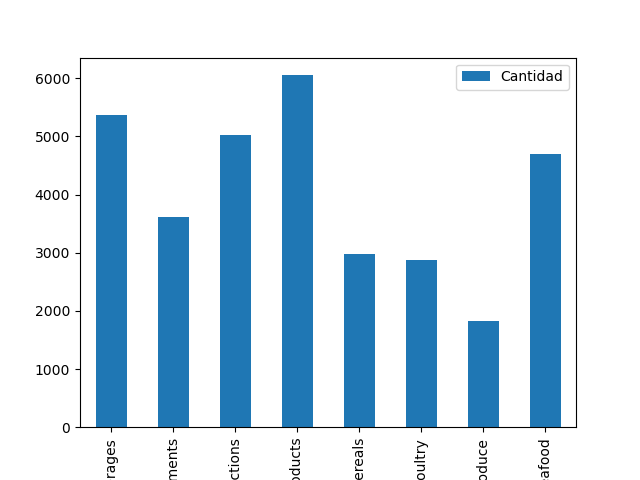

In [50]:
#Si creamos un grafico de barras, nombre del dataframe .plot para decirle que imprima el grafico y luego con kind el tipo de grafico, bar = barras, hist= histograma
#requiere del impor del objeto
sumacategoria.plot(kind="bar")
plt.show()

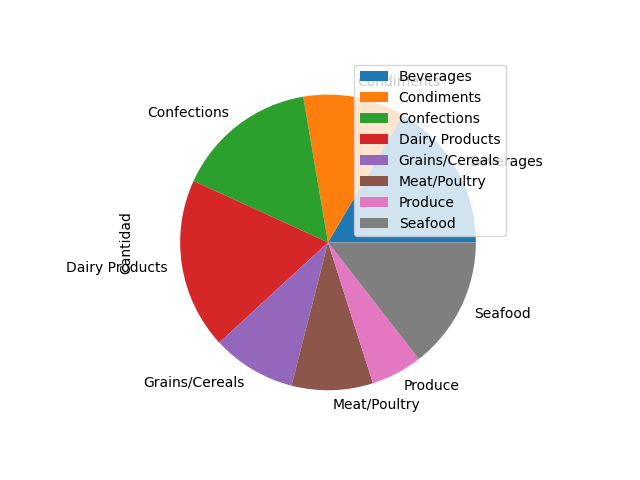

In [52]:
sumacategoria.plot(x="Categoria", y="Cantidad",kind="pie")
plt.show()